# comparison of 2nd order daily road and internet traffic features

In [46]:
options(repr.plot.width=10, repr.plot.height=5)
internet <- read.csv("bandwidth_features_london.csv")
road <- read.csv("road_features_london.csv")
head(road)
head(internet)

X,speed.changepoint1,speed.changepoint2,speed.changepoint3,speed.changepoint4,speed.changepoint5,speed.value1,speed.value2,speed.value3,speed.value4,⋯,day.stats.kurtosis,day.stats.diff.Min.,day.stats.diff.X1st.Qu.,day.stats.diff.Median,day.stats.diff.Mean,day.stats.diff.X3rd.Qu.,day.stats.diff.Max.,day.stats.diff.sd,day.stats.diff.skewness,day.stats.diff.kurtosis
2016-01-01,21,39,68,68,83,61.96707,63.77429,60.54143,60.54143,⋯,2.982758,-0.3864230,-0.07160416,-0.025750464,-0.0073684211,0.06732313,0.2791804,0.1485087,-0.25478932,3.328902
2016-01-02,12,36,56,65,92,58.74312,62.31922,54.82363,55.04895,⋯,1.779316,-0.7152680,-0.16585815,0.047535161,0.0123157895,0.23242951,0.5934902,0.3214980,-0.42893122,2.632711
2016-01-03,14,34,54,NA,92,60.53161,62.85261,53.71352,NA,⋯,2.591870,-0.9236427,-0.16359835,0.058736898,-0.0009473684,0.19741796,0.6265545,0.3547246,-0.73586844,3.474434
2016-01-04,12,20,30,68,83,59.15192,60.19548,56.87642,58.30174,⋯,3.745717,-0.9965788,-0.22152663,-0.058271153,-0.0304210526,0.15126606,0.7899888,0.3395244,-0.14224824,3.784296
2016-01-05,9,20,31,70,84,56.52462,58.62757,53.94578,56.48730,⋯,3.404194,-1.2606169,-0.20367526,-0.020093942,0.0009473684,0.25931672,1.1692658,0.4744125,0.03543678,3.656128
2016-01-06,10,20,31,69,84,56.84167,58.33588,53.89711,56.49921,⋯,3.298924,-1.1936249,-0.17903336,-0.008398197,0.0087368421,0.25266739,1.0417931,0.4439887,-0.07427449,3.608673


X,changepoint1,changepoint2,changepoint3,changepoint4,value1,value2,value3,value4,Min.,⋯,evcom.kurtosis,evcom.diff.Min.,evcom.diff.1st.Qu.,evcom.diff.Median,evcom.diff.Mean,evcom.diff.3rd.Qu.,evcom.diff.Max.,evcom.diff.sd,evcom.diff.skewness,evcom.diff.kurtosis
2016-01-01,70,NA,NA,250,142094581805,NA,NA,449523344203,143770736384,⋯,1.924710,401907916456,416933225843,427762129779,425759829779,438376637395,441250893916,11753115016,-0.2573730,1.924710
2016-01-02,67,199,210,233,148035334122,443893943836,435825414109,461636251086,148743229845,⋯,4.027086,412032007755,440052498462,445847497414,445522915809,451147855817,462726229125,11322320919,-0.7879335,4.027086
2016-01-03,69,NA,NA,241,154515455881,NA,NA,483353078032,154824161264,⋯,1.924700,438120266851,452433589801,469669191285,463471502051,473054482776,486085864668,13871394003,-0.4288955,1.924700
2016-01-04,58,197,216,249,148035131315,464677045201,452847569505,487948966186,150665479496,⋯,2.427025,449556636553,457340399215,461028976060,460227649847,464268986840,467029149136,4783434325,-0.6249541,2.427025
2016-01-05,56,202,222,249,159042717644,482618200642,463088495768,499520218623,157724785859,⋯,3.232833,448954882613,466512692027,469333429395,470120477181,475976936402,483035505031,8105289455,-0.5084312,3.232833
2016-01-06,55,202,218,249,155683624698,475163929776,470021276110,495608913792,156881748548,⋯,2.268679,461302506363,468012970073,472853984472,471519223759,475563635498,477707353696,5019458071,-0.7349046,2.268679


inersection of internet + road dates.

In [47]:
weekday <- function(x) weekdays(as.Date(x)) != "Saturday" & x != "Sunday"
intersection <- intersect(road$X, internet$X)
intersection <- intersection[weekday(intersection)] # discard weekends
road <- road[road$X %in% intersection, ]
internet <- internet[internet$X %in% intersection, ]
if(nrow(road) != nrow(internet)) stop("cH3ck y0 s31f b4 y0 R3k7 y0 531f.")

## create 3rd order features

### internet

#### work day length

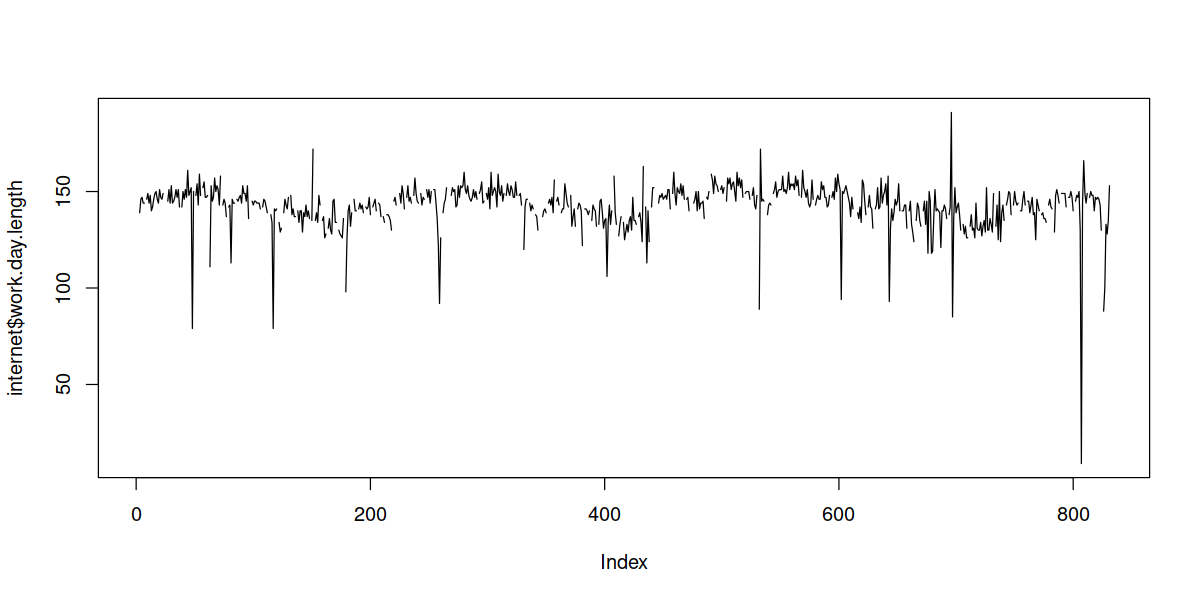

In [48]:
internet$work.day.length <- with(internet, changepoint2 - changepoint1)
plot(internet$work.day.length, type="l")

#### day length (trough to peak)

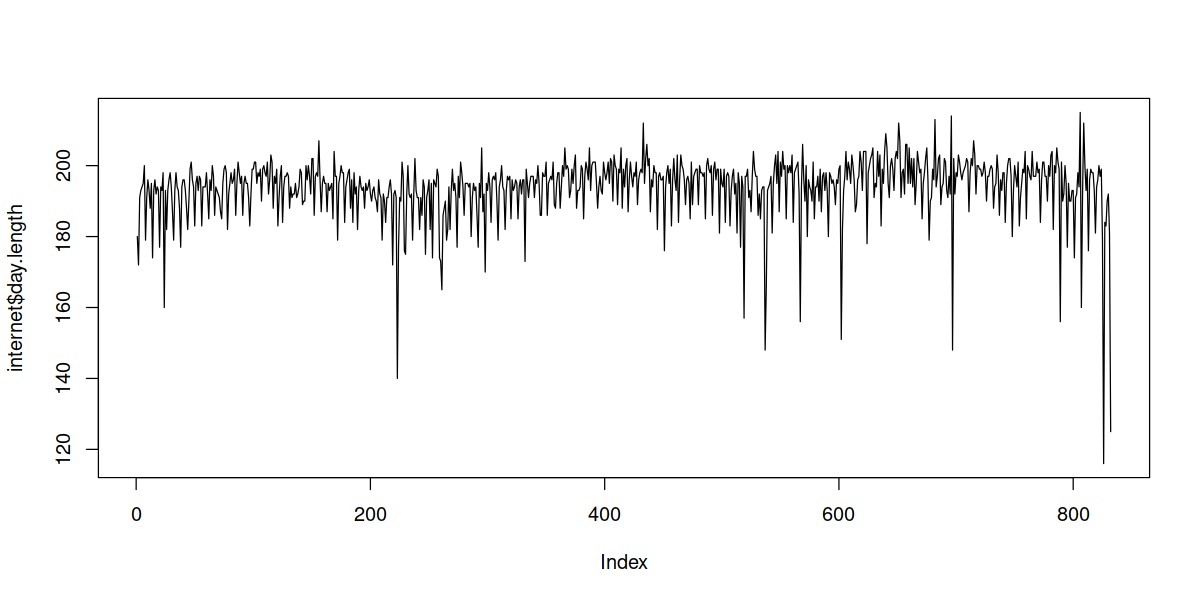

In [49]:
internet$day.length <- with(internet, changepoint4 - changepoint1)
plot(internet$day.length, type="l")

#### end of work to evening peak length ("commute time")

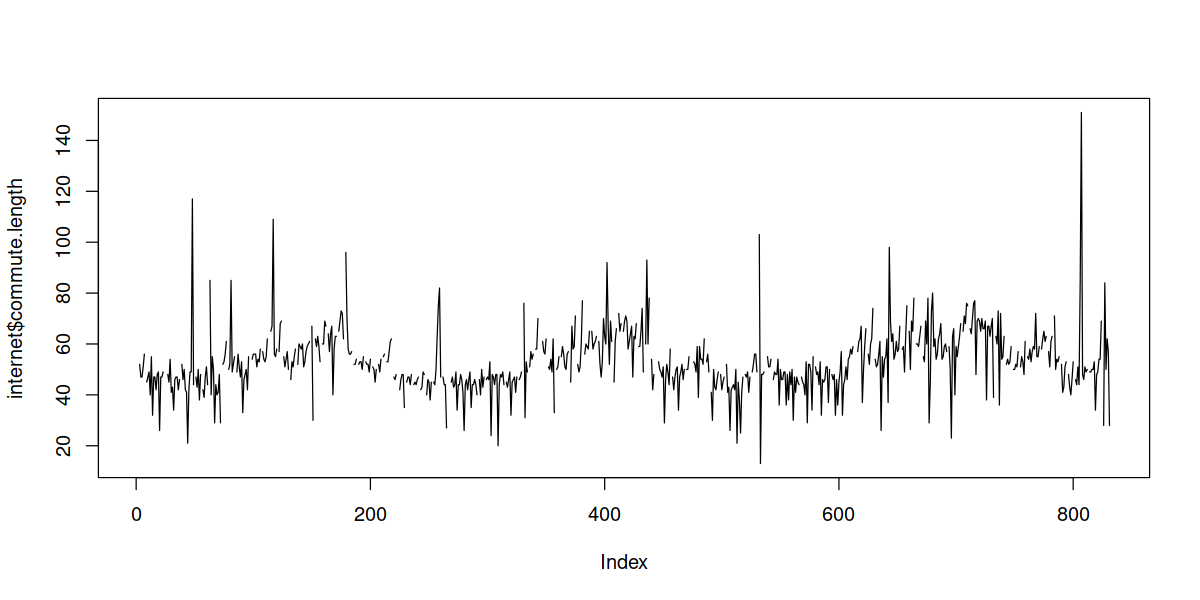

In [50]:
internet$commute.length <- with(internet, changepoint4 - changepoint2)
plot(internet$commute.length, type="l")

#### end of work to commute trough

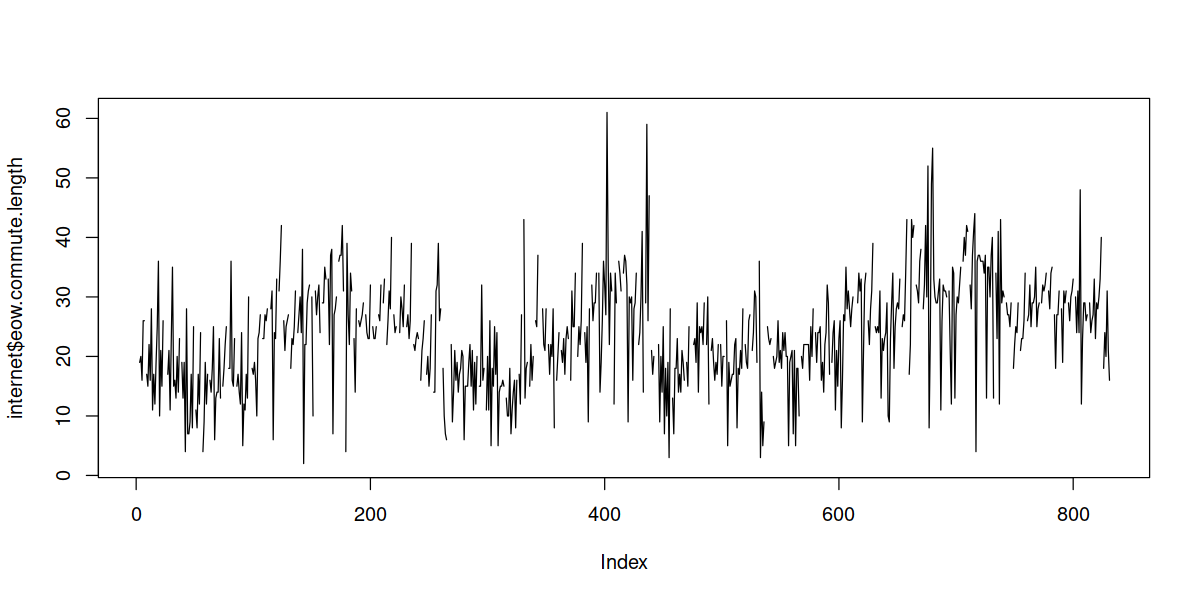

In [51]:
internet$eow.commute.length <- with(internet, changepoint3 - changepoint2)
plot(internet$eow.commute.length, type="l")

#### commute trough to evening peak length

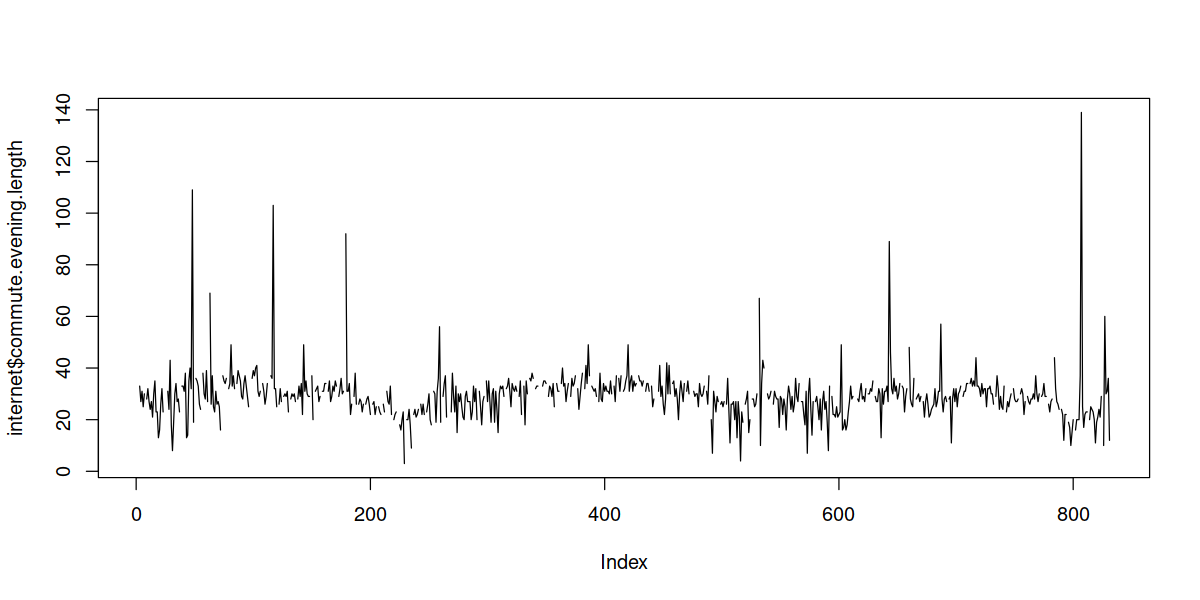

In [52]:
internet$commute.evening.length <- with(internet, changepoint4 - changepoint3)
plot(internet$commute.evening.length, type="l")

#### morning trough to evening peak bw diff

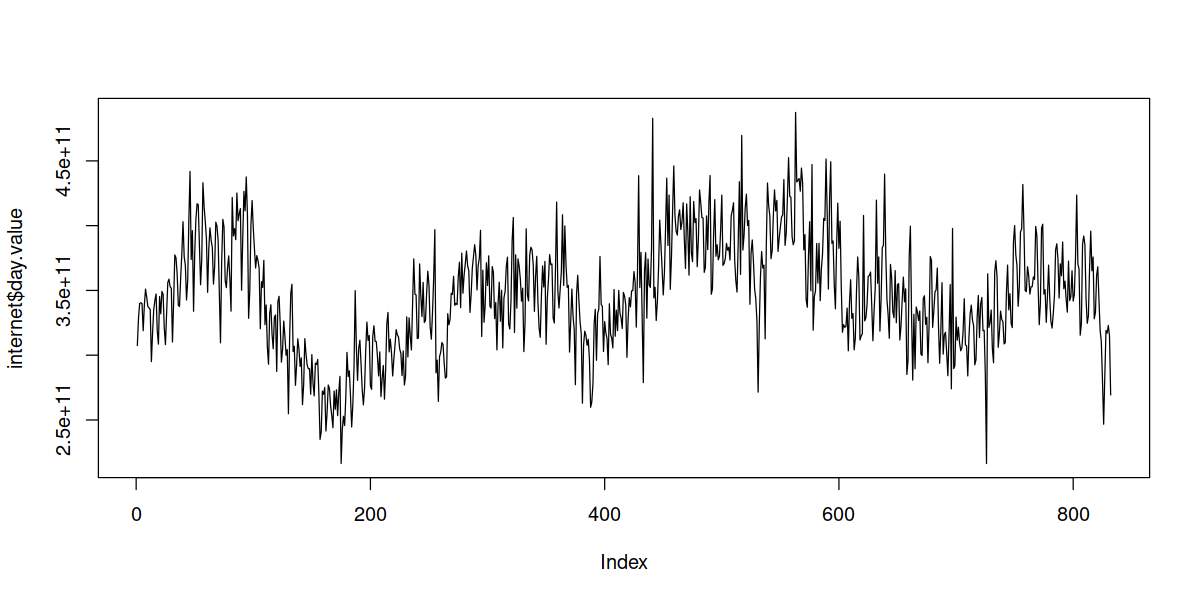

In [53]:
internet$day.value <- with(internet, value4 - value1)
plot(internet$day.value, type="l")

#### morning trough to eow bw diff

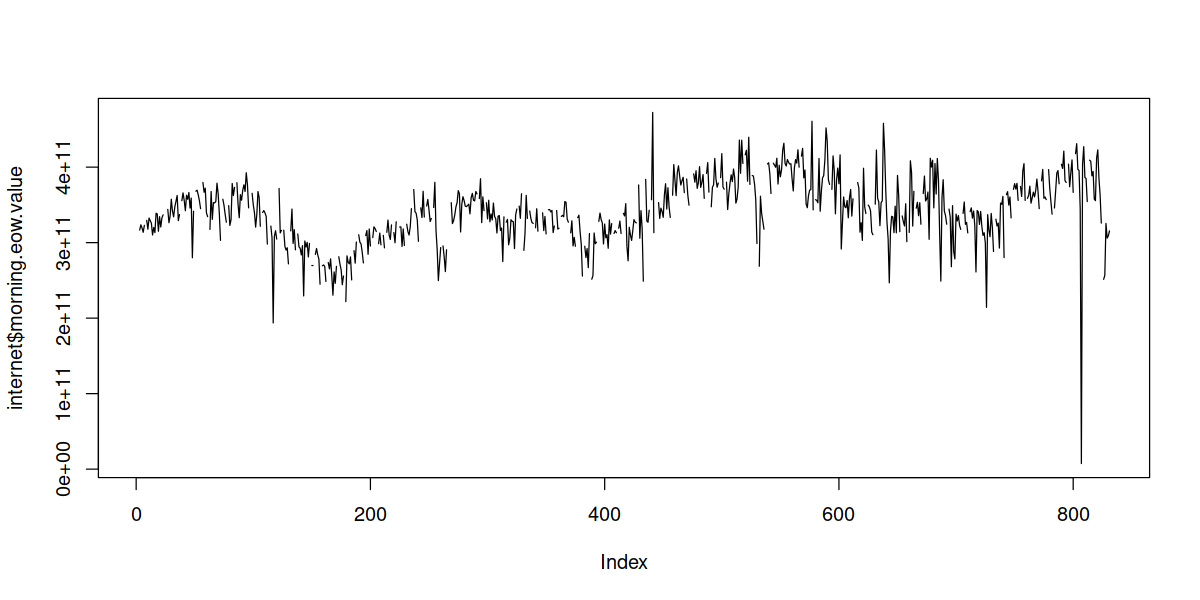

In [54]:
internet$morning.eow.value <- with(internet, value2 - value1)
plot(internet$morning.eow.value, type="l")

#### eow to commute trough drawdown

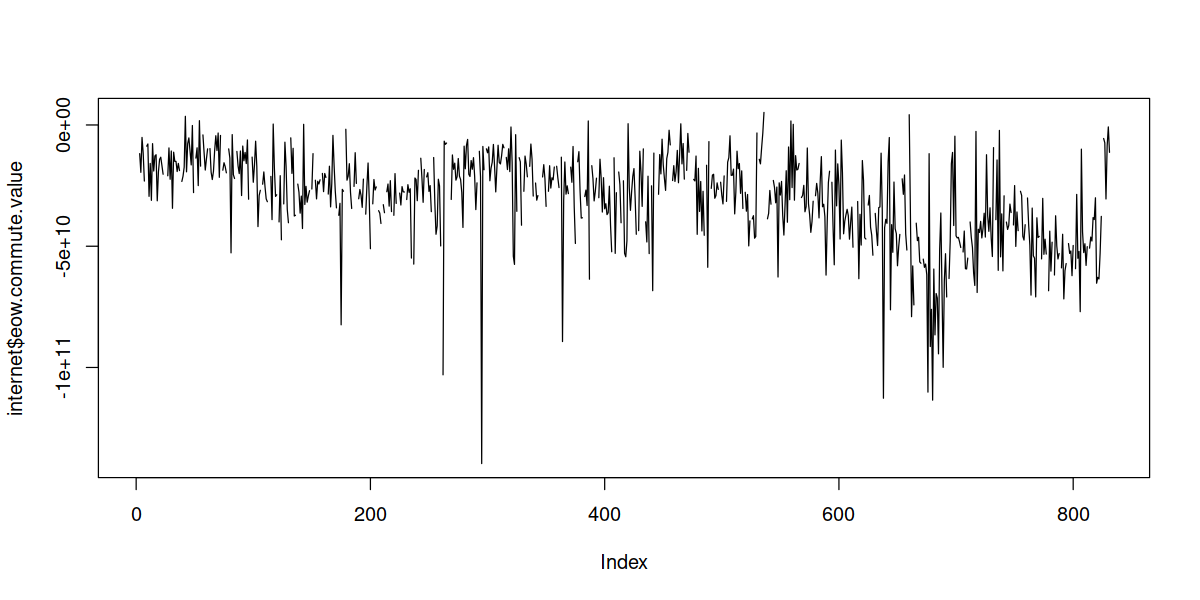

In [55]:
internet$eow.commute.value <- with(internet, value3 - value2)
plot(internet$eow.commute.value, type="l")

##### commute to evening peak drawdown

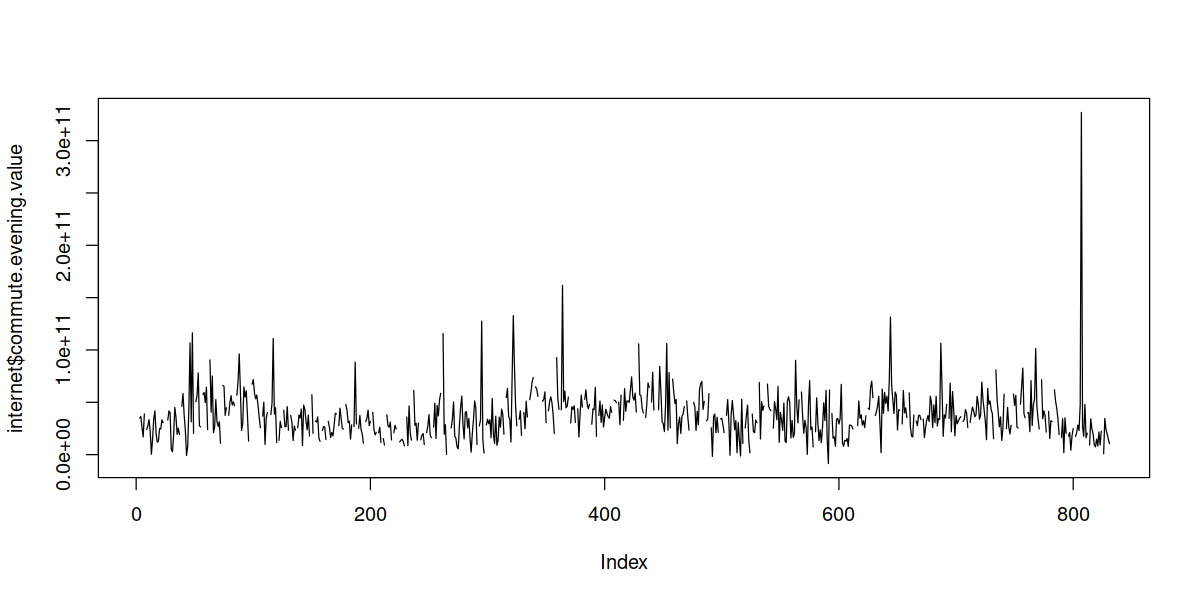

In [56]:
internet$commute.evening.value <- with(internet, value4 - value3)
plot(internet$commute.evening.value, type="l")

#### evening peak - eow peak

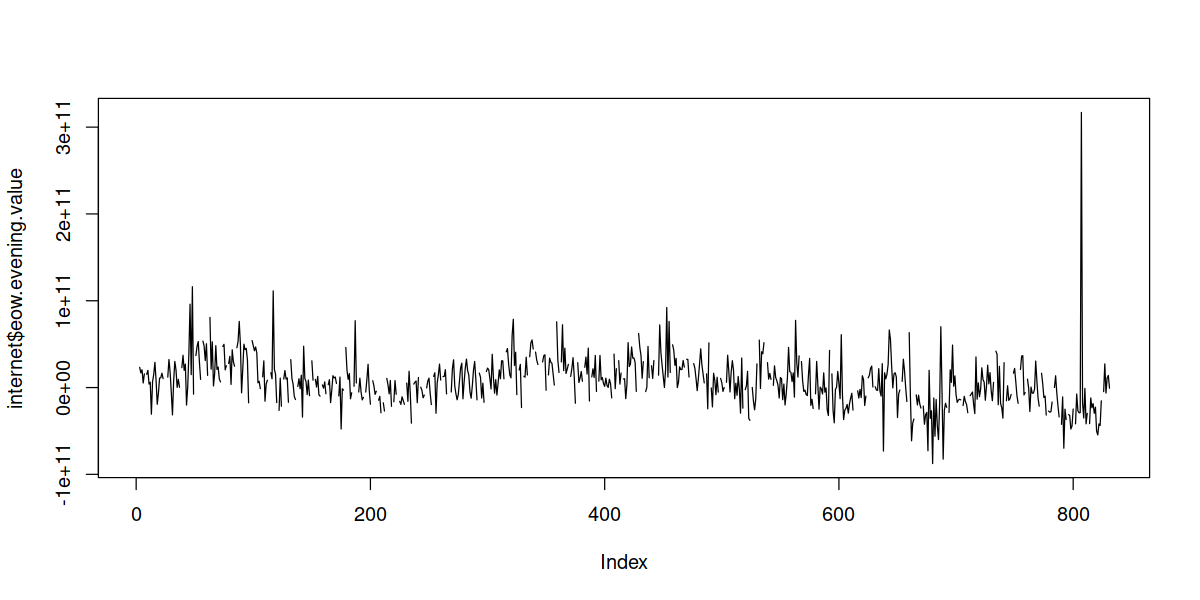

In [57]:
internet$eow.evening.value <- with(internet, value4 - value2)
plot(internet$eow.evening.value, type="l")

#### commute trough - morning trough (morning trough quite stable so might be better drawdown indicator)

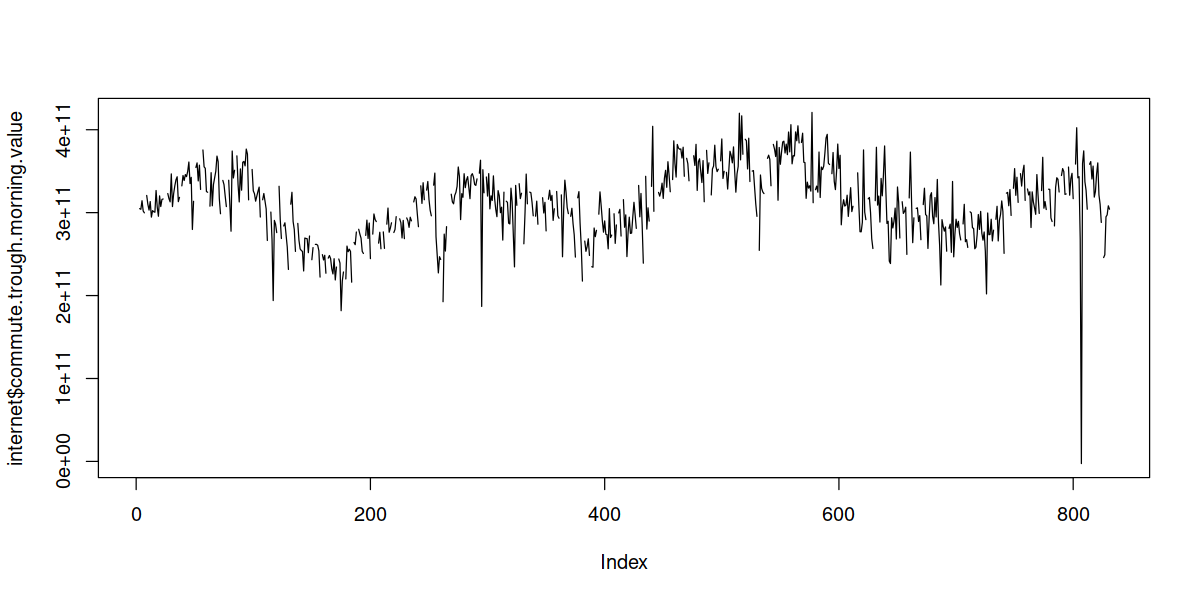

In [58]:
internet$commute.trough.morning.value <- with(internet, value3 - value1)
plot(internet$commute.trough.morning.value, type="l")

### road

#### work day length (morning peak - evening count peak)

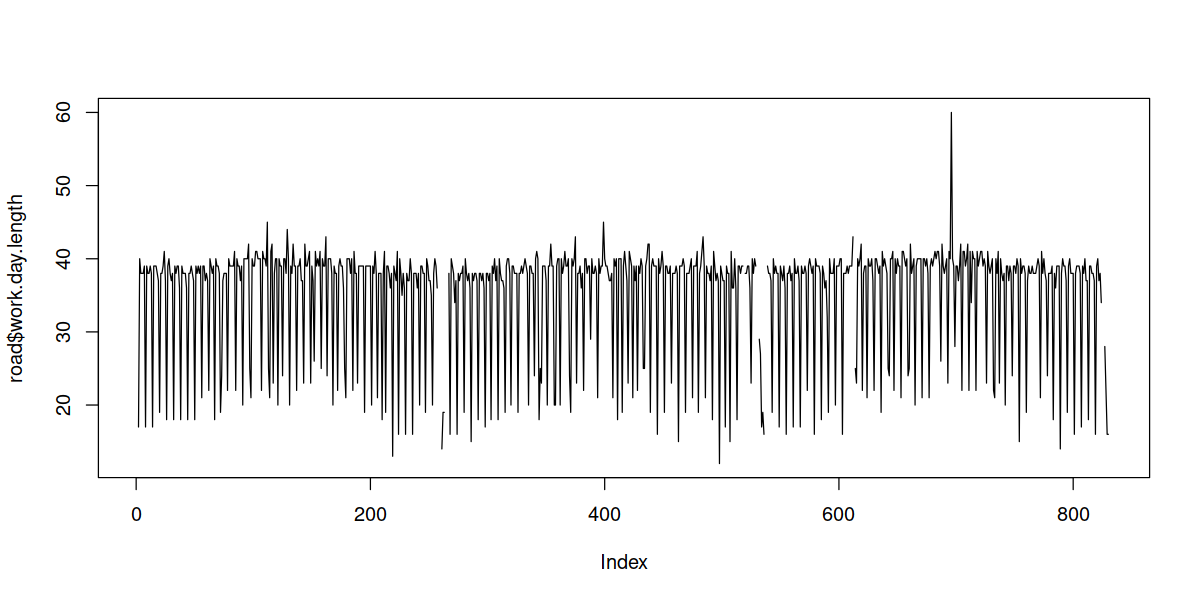

In [59]:
road$work.day.length <- with(road, count.changepoint4 - count.changepoint2)
plot(road$work.day.length, type="l")

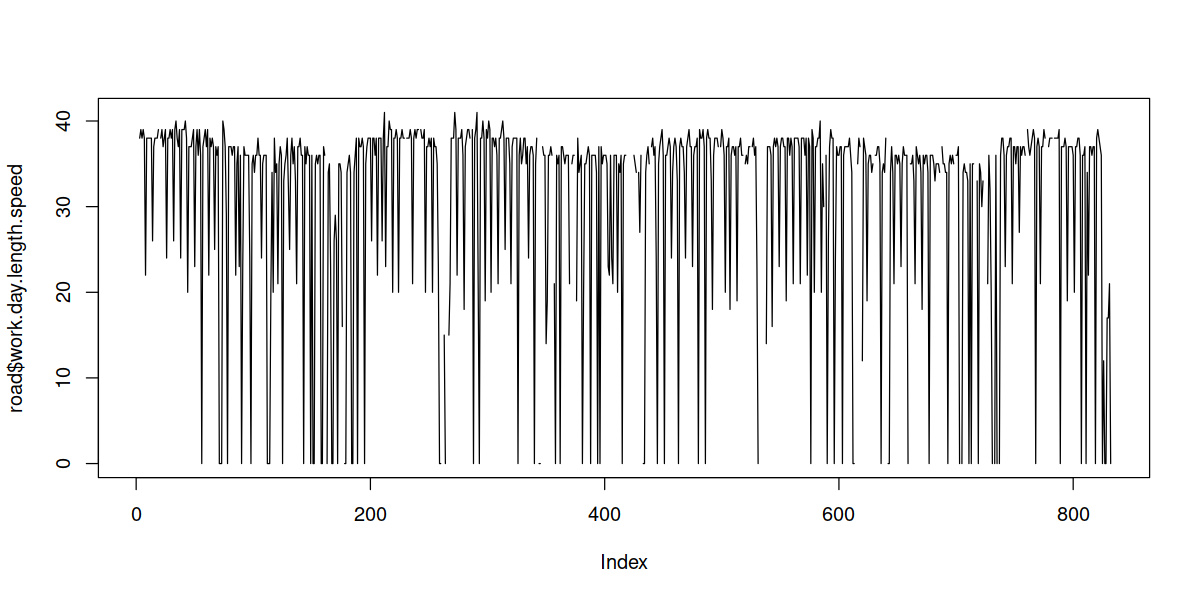

In [60]:
road$work.day.length.speed <- with(road, speed.changepoint4 - speed.changepoint3)
plot(road$work.day.length.speed, type="l")

#### evening commute to evening peak recovery time

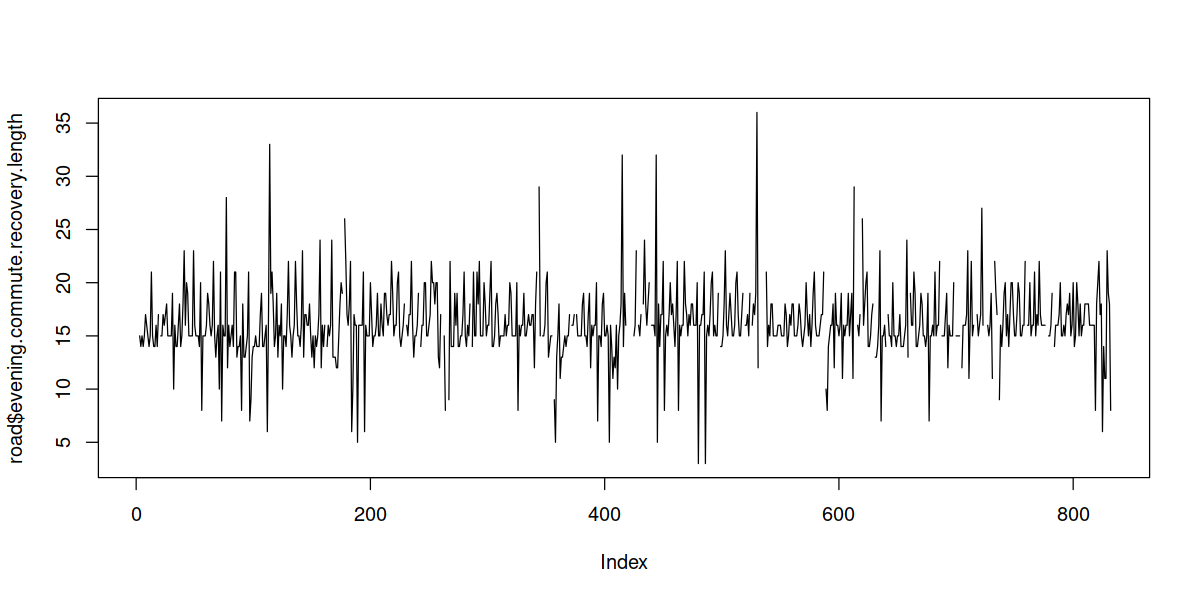

In [61]:
road$evening.commute.recovery.length <- with(road, speed.changepoint5 - speed.changepoint4)
plot(road$evening.commute.recovery.length, type="l")

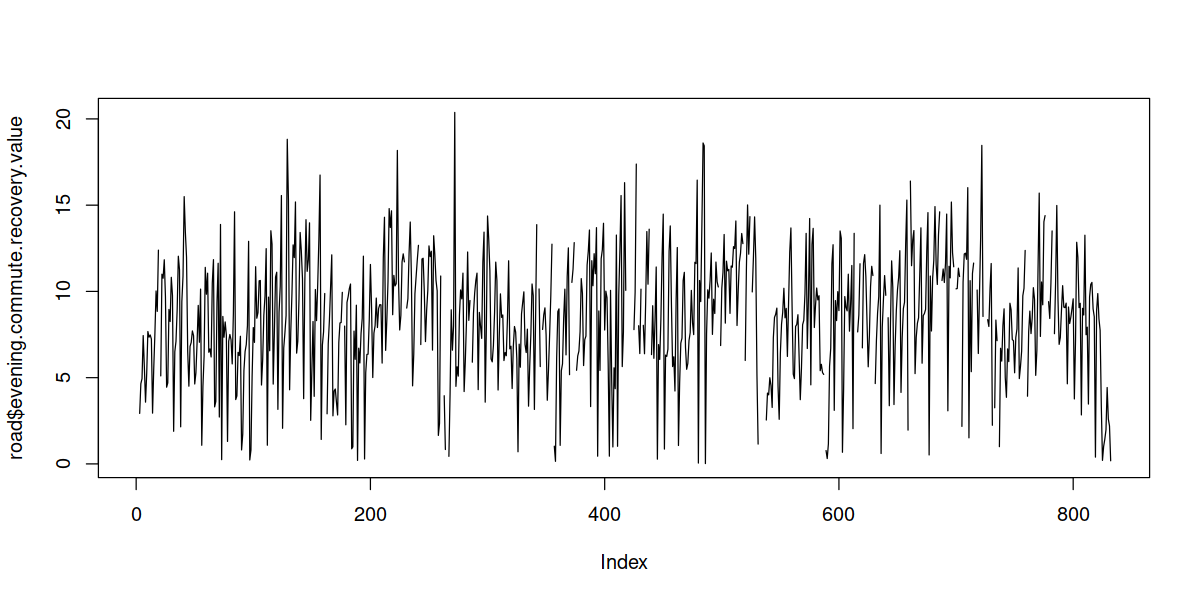

In [62]:
# drawdown from evening peak speed and commute low speed.
options(repr.plot.width=10, repr.plot.height=5)
road$evening.commute.recovery.value <- with(road, speed.value5 - speed.value4)
plot(road$evening.commute.recovery.value, type="l")

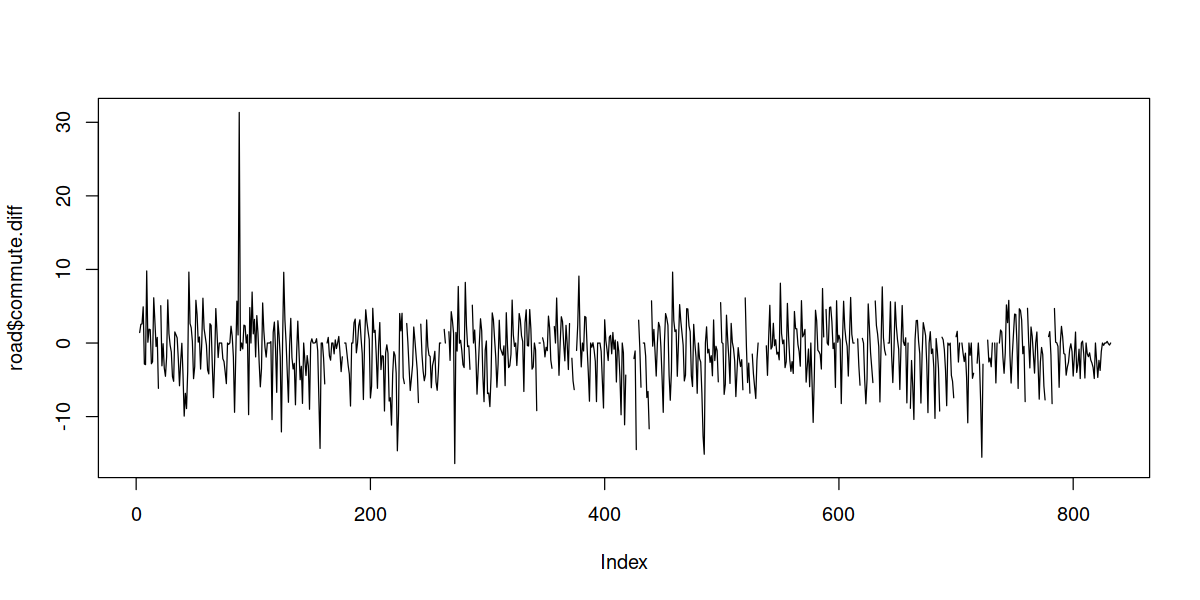

In [63]:
# evening commute value - morning commute value
road$commute.diff <- with(road, speed.value4 - speed.value3)
plot(road$commute.diff, type="l")

In [82]:
# interested in bottom left quadrant (open image in new tab)
png("/tmp/massive_matrix.png", width=10000, height=10000)
#options(repr.plot.width=30, repr.plot.height=30)
plot(cbind(internet[, -1], road[, -1]), pch=".")
dev.off()

png 
  2

In [65]:
colnames(internet)
colnames(road)

[1] "X"                            "changepoint1"                
 [3] "changepoint2"                 "changepoint3"                
 [5] "changepoint4"                 "value1"                      
 [7] "value2"                       "value3"                      
 [9] "value4"                       "Min."                        
[11] "X1st.Qu."                     "Median"                      
[13] "Mean"                         "X3rd.Qu."                    
[15] "Max."                         "sd"                          
[17] "skewness"                     "kurtosis"                    
[19] "evcom.Min."                   "evcom.1st.Qu."               
[21] "evcom.Median"                 "evcom.Mean"                  
[23] "evcom.3rd.Qu."                "evcom.Max."                  
[25] "evcom.sd"                     "evcom.skewness"              
[27] "evcom.kurtosis"               "evcom.diff.Min."             
[29] "evcom.diff.1st.Qu."           "evcom.diff.Median"           
[31] "evcom.diff.Mean"              "evcom.diff.3rd.Qu."          
[33] "evcom.diff.Max."              "evcom.diff.sd"               
[35] "evcom.diff.skewness"          "evcom.diff.kurtosis"         
[37] "work.day.length"              "day.length"                  
[39] "commute.length"               "eow.commute.length"          
[41] "commute.evening.length"       "day.value"                   
[43] "morning.eow.value"            "eow.commute.value"           
[45] "commute.evening.value"        "eow.evening.value"           
[47] "commute.trough.morning.value"

[1] "X"                               "speed.changepoint1"             
 [3] "speed.changepoint2"              "speed.changepoint3"             
 [5] "speed.changepoint4"              "speed.changepoint5"             
 [7] "speed.value1"                    "speed.value2"                   
 [9] "speed.value3"                    "speed.value4"                   
[11] "speed.value5"                    "count.changepoint1"             
[13] "count.changepoint2"              "count.changepoint3"             
[15] "count.changepoint4"              "count.value1"                   
[17] "count.value2"                    "count.value3"                   
[19] "count.value4"                    "evcom.fixed.mph.Min."           
[21] "evcom.fixed.mph.X1st.Qu."        "evcom.fixed.mph.Median"         
[23] "evcom.fixed.mph.Mean"            "evcom.fixed.mph.X3rd.Qu."       
[25] "evcom.fixed.mph.Max."            "evcom.fixed.mph.sd"             
[27] "evcom.fixed.mph.skewness"        "evcom.fixed.mph.kurtosis"       
[29] "evcom.fixed.diff.Min."           "evcom.fixed.diff.X1st.Qu."      
[31] "evcom.fixed.diff.Median"         "evcom.fixed.diff.Mean"          
[33] "evcom.fixed.diff.X3rd.Qu."       "evcom.fixed.diff.Max."          
[35] "evcom.fixed.diff.sd"             "evcom.fixed.diff.skewness"      
[37] "evcom.fixed.diff.kurtosis"       "day.stats.Min."                 
[39] "day.stats.X1st.Qu."              "day.stats.Median"               
[41] "day.stats.Mean"                  "day.stats.X3rd.Qu."             
[43] "day.stats.Max."                  "day.stats.sd"                   
[45] "day.stats.skewness"              "day.stats.kurtosis"             
[47] "day.stats.diff.Min."             "day.stats.diff.X1st.Qu."        
[49] "day.stats.diff.Median"           "day.stats.diff.Mean"            
[51] "day.stats.diff.X3rd.Qu."         "day.stats.diff.Max."            
[53] "day.stats.diff.sd"               "day.stats.diff.skewness"        
[55] "day.stats.diff.kurtosis"         "work.day.length"                
[57] "work.day.length.speed"           "evening.commute.recovery.length"
[59] "evening.commute.recovery.value"  "commute.diff"

In [66]:
#cors <- round(cor(cbind(int=internet[, -1], road=road[, -1]), use = "complete.obs"), 2)
cors <- round(cor(cbind(int=internet[, -1], road=road[, -1]), use = "pairwise.complete.obs"), 2)
cors[lower.tri(cors, diag=T)] <- NA # rm dups + self comp
cors

,int.changepoint1,int.changepoint2,int.changepoint3,int.changepoint4,int.value1,int.value2,int.value3,int.value4,int.Min.,int.X1st.Qu.,⋯,road.day.stats.diff.X3rd.Qu.,road.day.stats.diff.Max.,road.day.stats.diff.sd,road.day.stats.diff.skewness,road.day.stats.diff.kurtosis,road.work.day.length,road.work.day.length.speed,road.evening.commute.recovery.length,road.evening.commute.recovery.value,road.commute.diff
int.changepoint1,NA,0.04,-0.05,-0.05,-0.36,-0.46,-0.40,-0.39,-0.37,-0.48,⋯,-0.56,-0.47,-0.56,-0.09,-0.04,-0.65,-0.57,-0.06,-0.43,-0.03
int.changepoint2,NA,NA,0.66,0.12,0.03,0.29,0.39,0.22,0.03,-0.03,⋯,0.13,-0.02,0.08,-0.20,-0.04,-0.18,0.05,-0.08,-0.09,0.16
int.changepoint3,NA,NA,NA,0.39,0.04,0.28,0.19,-0.03,0.04,0.09,⋯,0.07,0.14,0.13,0.13,0.02,0.15,0.15,0.06,0.18,-0.12
int.changepoint4,NA,NA,NA,NA,-0.25,-0.16,-0.23,-0.14,-0.26,-0.07,⋯,0.06,0.15,0.14,0.06,0.12,0.31,0.11,0.06,0.15,0.01
int.value1,NA,NA,NA,NA,NA,0.78,0.74,0.70,0.99,0.89,⋯,0.12,0.08,0.07,0.09,-0.16,-0.02,0.06,0.11,0.11,-0.12
int.value2,NA,NA,NA,NA,NA,NA,0.95,0.88,0.77,0.81,⋯,0.26,0.15,0.23,-0.02,-0.11,0.06,0.20,0.00,0.07,0.04
int.value3,NA,NA,NA,NA,NA,NA,NA,0.92,0.73,0.73,⋯,0.24,0.09,0.18,-0.08,-0.12,-0.04,0.16,-0.02,0.00,0.09
int.value4,NA,NA,NA,NA,NA,NA,NA,NA,0.70,0.73,⋯,0.26,0.14,0.23,-0.09,-0.05,0.10,0.25,-0.03,0.04,0.15
int.Min.,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.90,⋯,0.12,0.08,0.06,0.10,-0.17,-0.01,0.07,0.11,0.12,-0.13
int.X1st.Qu.,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.21,0.20,0.19,0.16,-0.08,0.22,0.21,0.13,0.25,-0.14


compare **all** internet vs road features.

In [67]:
my_melt <- function(x) {
  row_names <- rep(rownames(x), ncol(x))
  col_names <- unlist(lapply(colnames(x), function(cn) rep(cn, nrow(x))))
  melt_vals <- as.vector(x)
  data.frame(row=row_names, col=col_names, val=melt_vals)
}

In [68]:
scores <- my_melt(cors)
scores <- scores[order(-scores$val), ]
scores <- scores[scores$val != 1, ]
rownames(scores) <- NULL
scores <- scores[!is.na(scores$val), ]

# rm self comps.
scores <- scores[!with(scores, (startsWith(as.character(row), "road") & startsWith(as.character(col), "road"))
                              | startsWith(as.character(row), "int" ) & startsWith(as.character(col), "int" )), ]

rownames(scores) <- NULL
options(repr.matrix.max.rows=nrow(scores))
scores

ERROR while rich displaying an object: Error in sprintf(header_wrap, paste(headers, collapse = "")): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mi

row,col,val
int.skewness,road.count.changepoint2,0.74
int.changepoint1,road.count.changepoint2,0.69
int.day.length,road.work.day.length,0.63
int.skewness,road.count.changepoint1,0.59
int.changepoint1,road.speed.changepoint3,0.58
int.skewness,road.count.changepoint3,0.57
int.changepoint1,road.count.value3,0.57
int.changepoint1,road.count.value1,0.55
int.changepoint1,road.speed.changepoint2,0.52
int.changepoint1,road.count.changepoint3,0.50



Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0270  -0.3502   0.3331   1.1051   6.1368 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.497e+01  7.828e-01  82.990   <2e-16 ***
x           -1.321e-11  1.539e-12  -8.587   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.399 on 711 degrees of freedom
  (119 observations deleted due to missingness)
Multiple R-squared:  0.09397,	Adjusted R-squared:  0.0927 
F-statistic: 73.74 on 1 and 711 DF,  p-value: < 2.2e-16


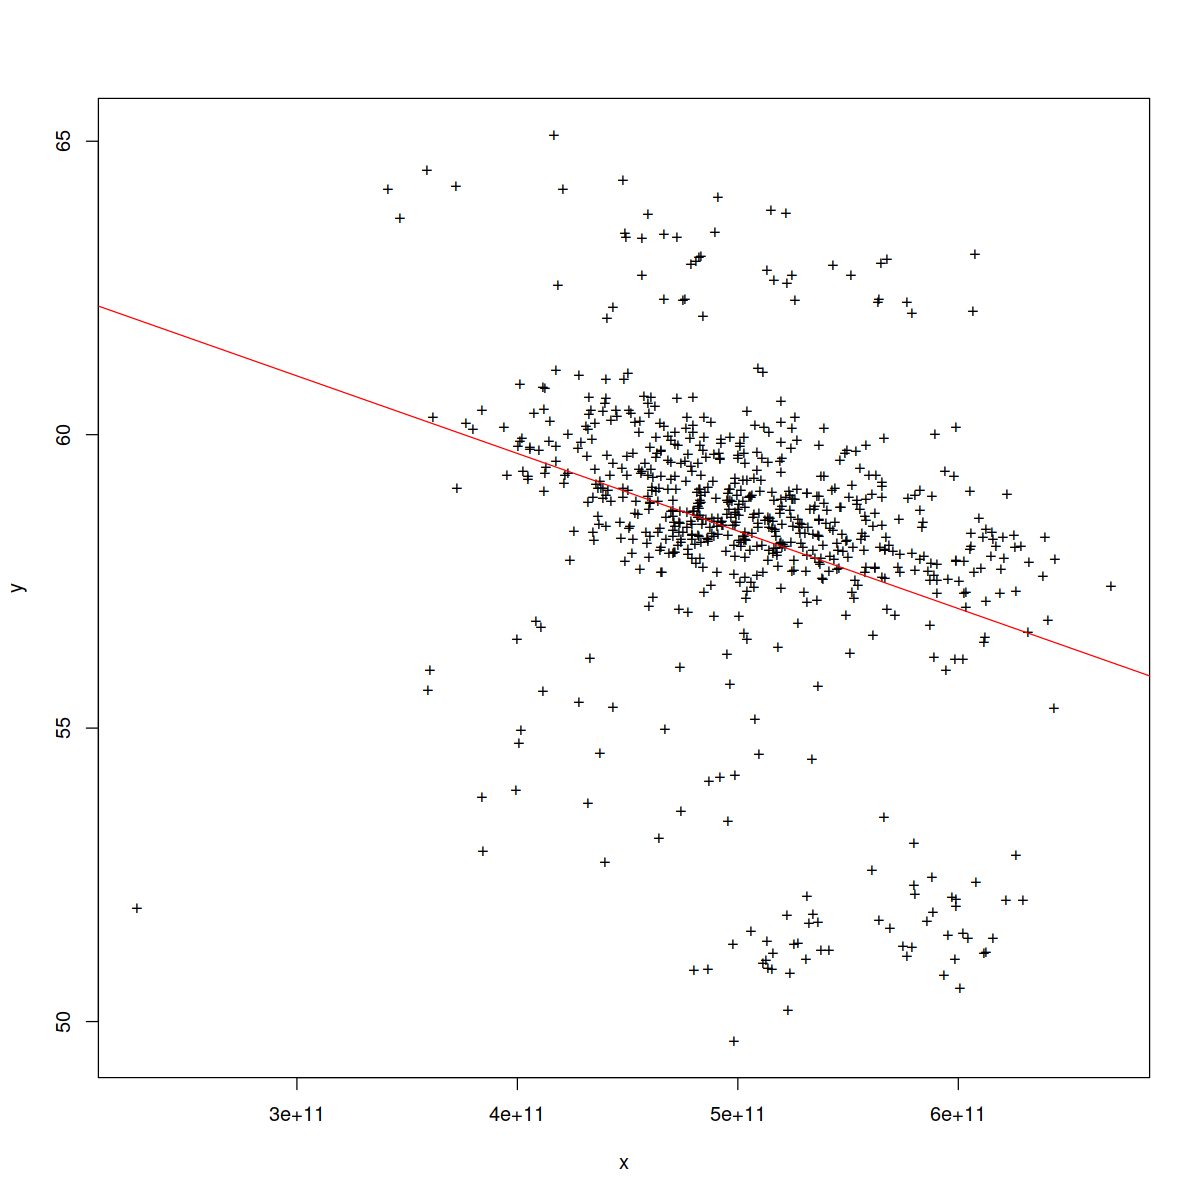

In [69]:
x <- internet$value2 # value1:4
y <- road$speed.value2 # (peak) speed before morning commute (suggests that this can be a predictor of bw.)
options(repr.plot.width=10, repr.plot.height=10)
plot(x, y, pch="+")
m <- lm(y ~ x)
abline(m, col="red")
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-399.52  -43.02    2.31   52.45  215.81 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1313.1989    80.9507   16.22   <2e-16 ***
x             -4.2871     0.4162  -10.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 90.35 on 814 degrees of freedom
  (16 observations deleted due to missingness)
Multiple R-squared:  0.1153,	Adjusted R-squared:  0.1142 
F-statistic: 106.1 on 1 and 814 DF,  p-value: < 2.2e-16


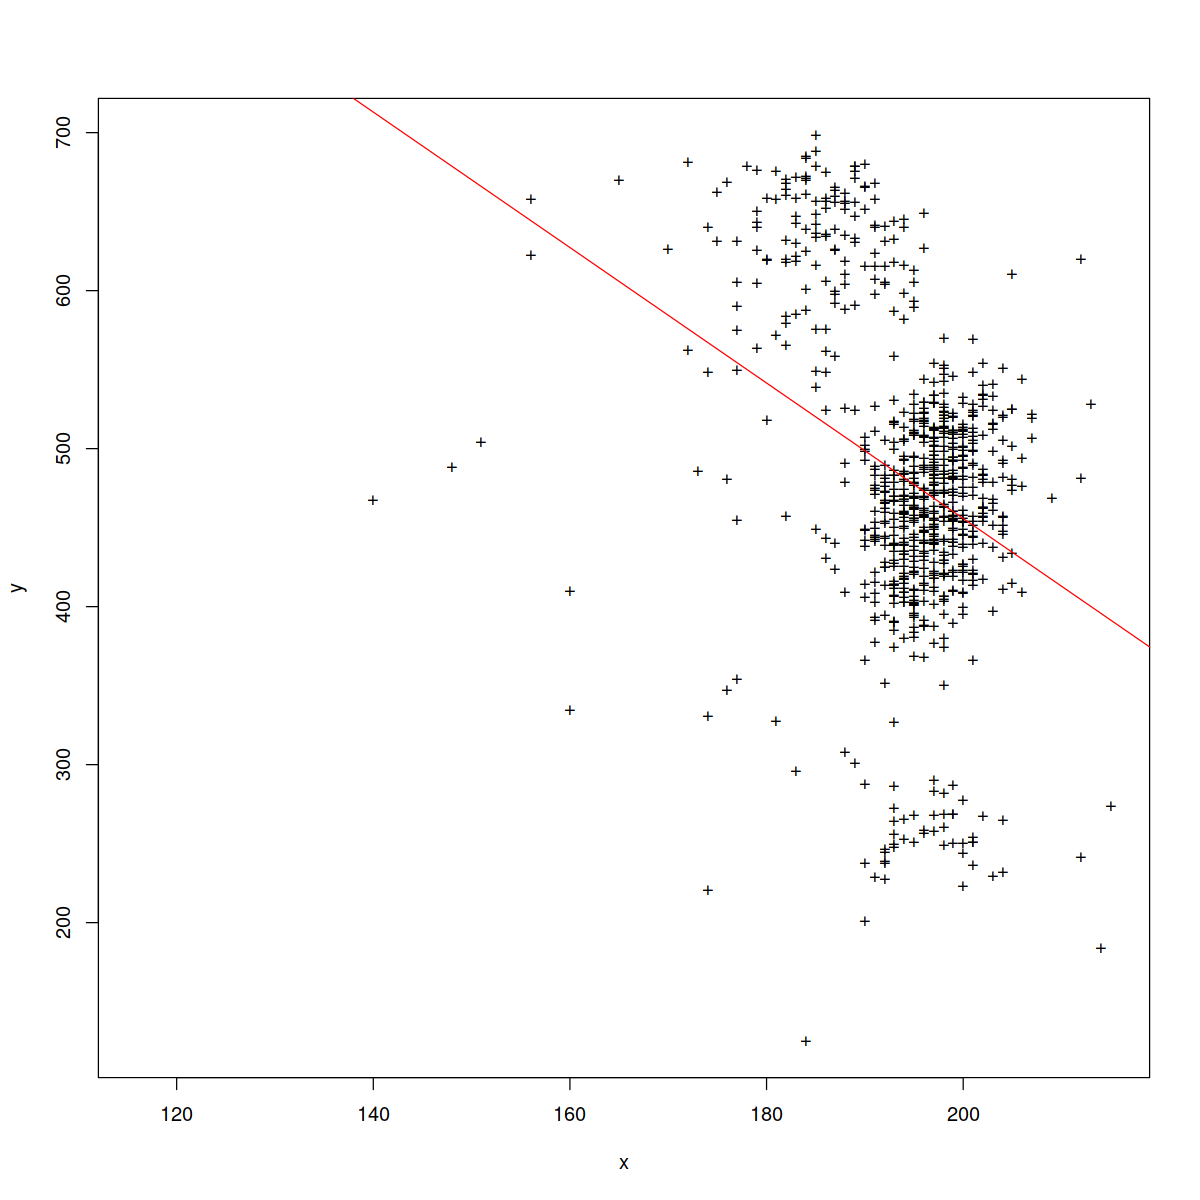

In [70]:
#'work.day.length' 'day.length' 'commute.length' 'eow.commute.length'
x <- internet$day.length # shorter days = more cars
y <- road$count.value3 # morning commute
options(repr.plot.width=10, repr.plot.height=10)
plot(x, y, pch="+")
m <- lm(y ~ x)
abline(m, col="red")
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.5047  -0.4486   0.5577   1.4953  20.4721 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.76140    1.75600  19.796   <2e-16 ***
x            0.02496    0.01228   2.032   0.0425 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.29 on 672 degrees of freedom
  (71 observations deleted due to missingness)
Multiple R-squared:  0.006108,	Adjusted R-squared:  0.004628 
F-statistic: 4.129 on 1 and 672 DF,  p-value: 0.04254


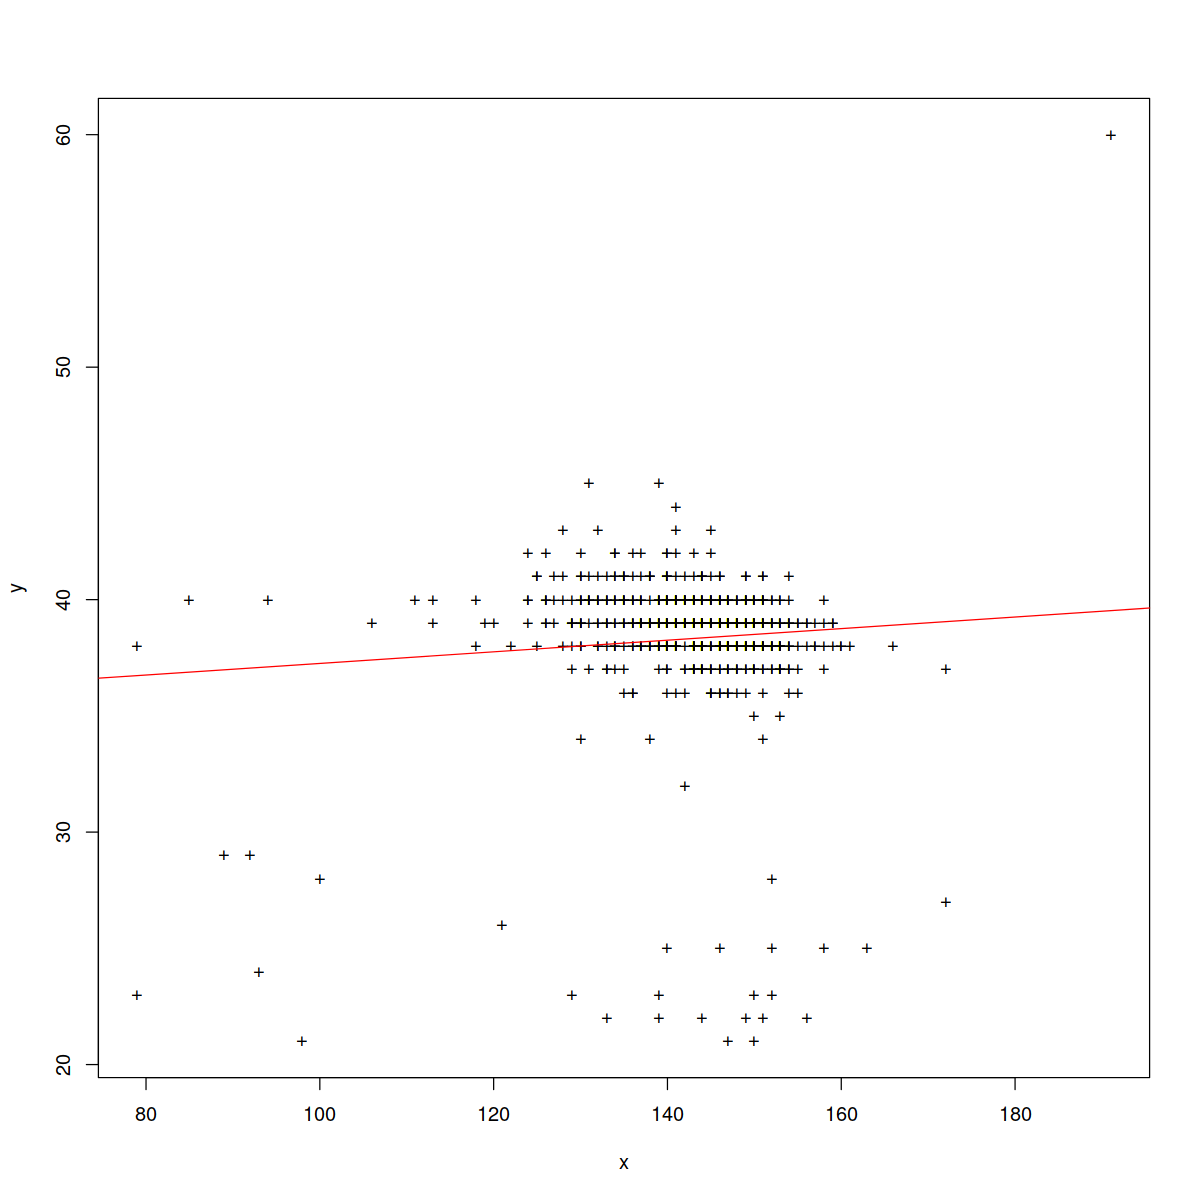

In [71]:
x <- internet$work.day.length # shorter days = more cars
y <- road$work.day.length # morning commute
lala <- data.frame(x, y)
lala <- lala[lala$y > 20, ]
x <- lala$x
y <- lala$y
options(repr.plot.width=10, repr.plot.height=10)
plot(x, y, pch="+")
m <- lm(y ~ x)
abline(m, col="red")
summary(m)

int.skewness	road.count.changepoint2	0.76
int.changepoint1	road.count.changepoint2	0.72
int.day.length	road.work.day.length	0.64
int.changepoint1	road.speed.changepoint3	0.63
int.skewness	road.count.changepoint3	0.60
int.changepoint1	road.count.value3	0.60
int.changepoint1	road.speed.changepoint2	0.59
int.skewness	road.count.changepoint1	0.59
int.changepoint1	road.count.value1	0.59
int.skewness	road.speed.changepoint2	0.56
int.skewness	road.speed.changepoint3	0.53
int.changepoint1	road.day.stats.diff.X1st.Qu.	0.53
int.changepoint1	road.count.changepoint3	0.52
int.Median	road.evcom.fixed.diff.sd	0.50


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94305 -0.18347  0.00191  0.19089  1.10960 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.686e-01  8.210e-02  -5.708 1.59e-08 ***
x            3.092e-12  1.877e-13  16.473  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2732 on 830 degrees of freedom
Multiple R-squared:  0.2464,	Adjusted R-squared:  0.2455 
F-statistic: 271.4 on 1 and 830 DF,  p-value: < 2.2e-16


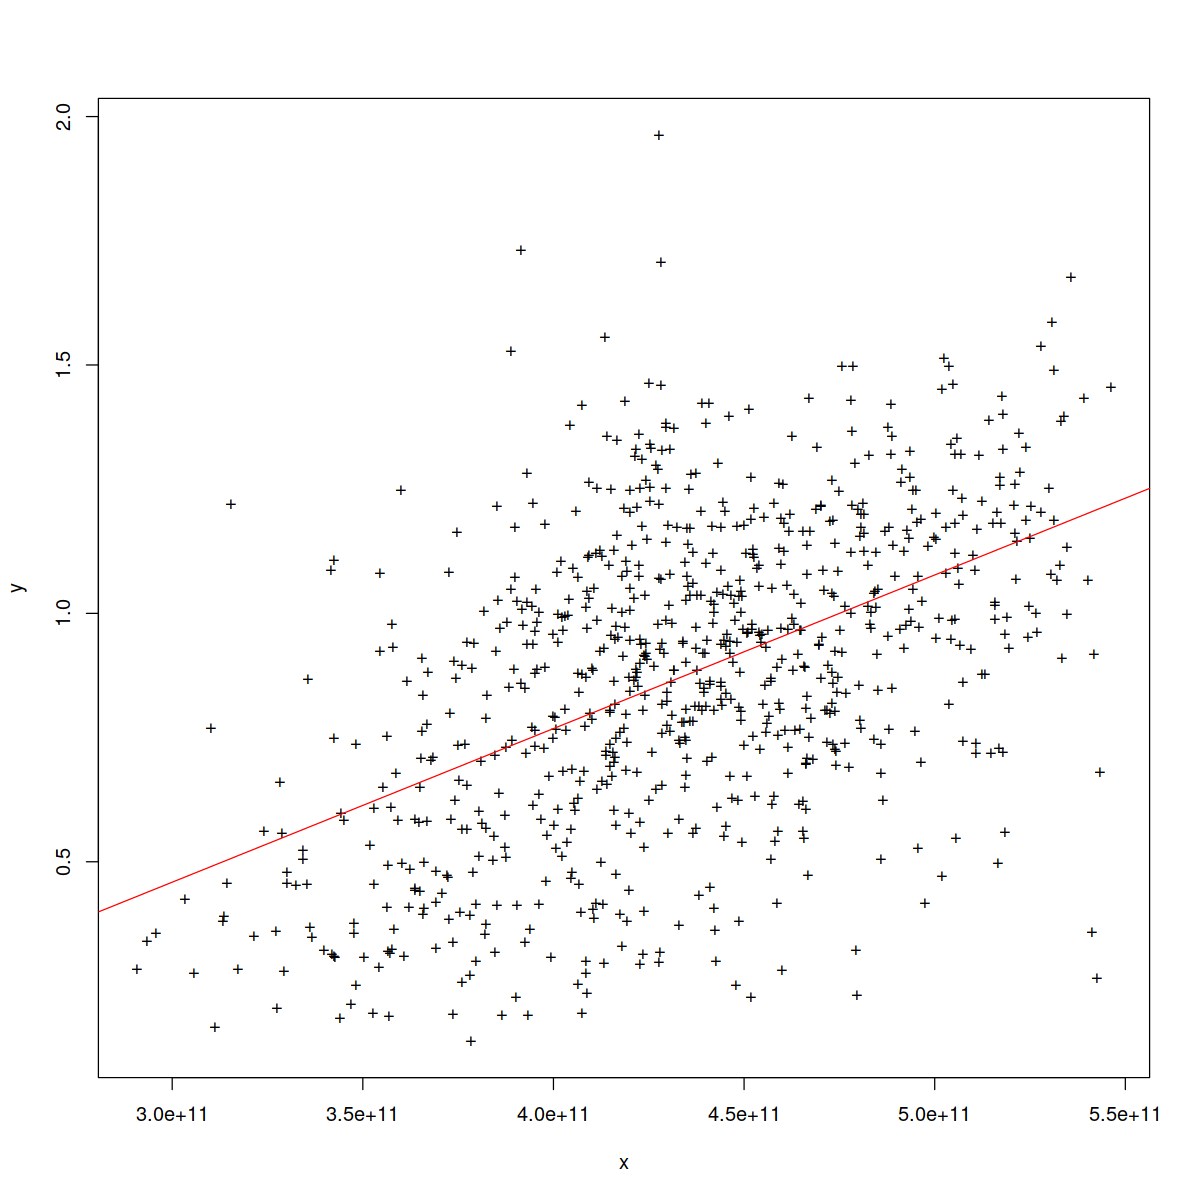

In [72]:
x <- internet$Median # shorter days = more cars
y <- road$evcom.fixed.diff.sd # morning commute
options(repr.plot.width=10, repr.plot.height=10)
plot(x, y, pch="+")
m <- lm(y ~ x)
abline(m, col="red")
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50086 -0.07500 -0.00848  0.07181  0.62145 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.31178    0.02144  -14.54   <2e-16 ***
x           -0.81615    0.03608  -22.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1398 on 830 degrees of freedom
Multiple R-squared:  0.3814,	Adjusted R-squared:  0.3807 
F-statistic: 511.8 on 1 and 830 DF,  p-value: < 2.2e-16


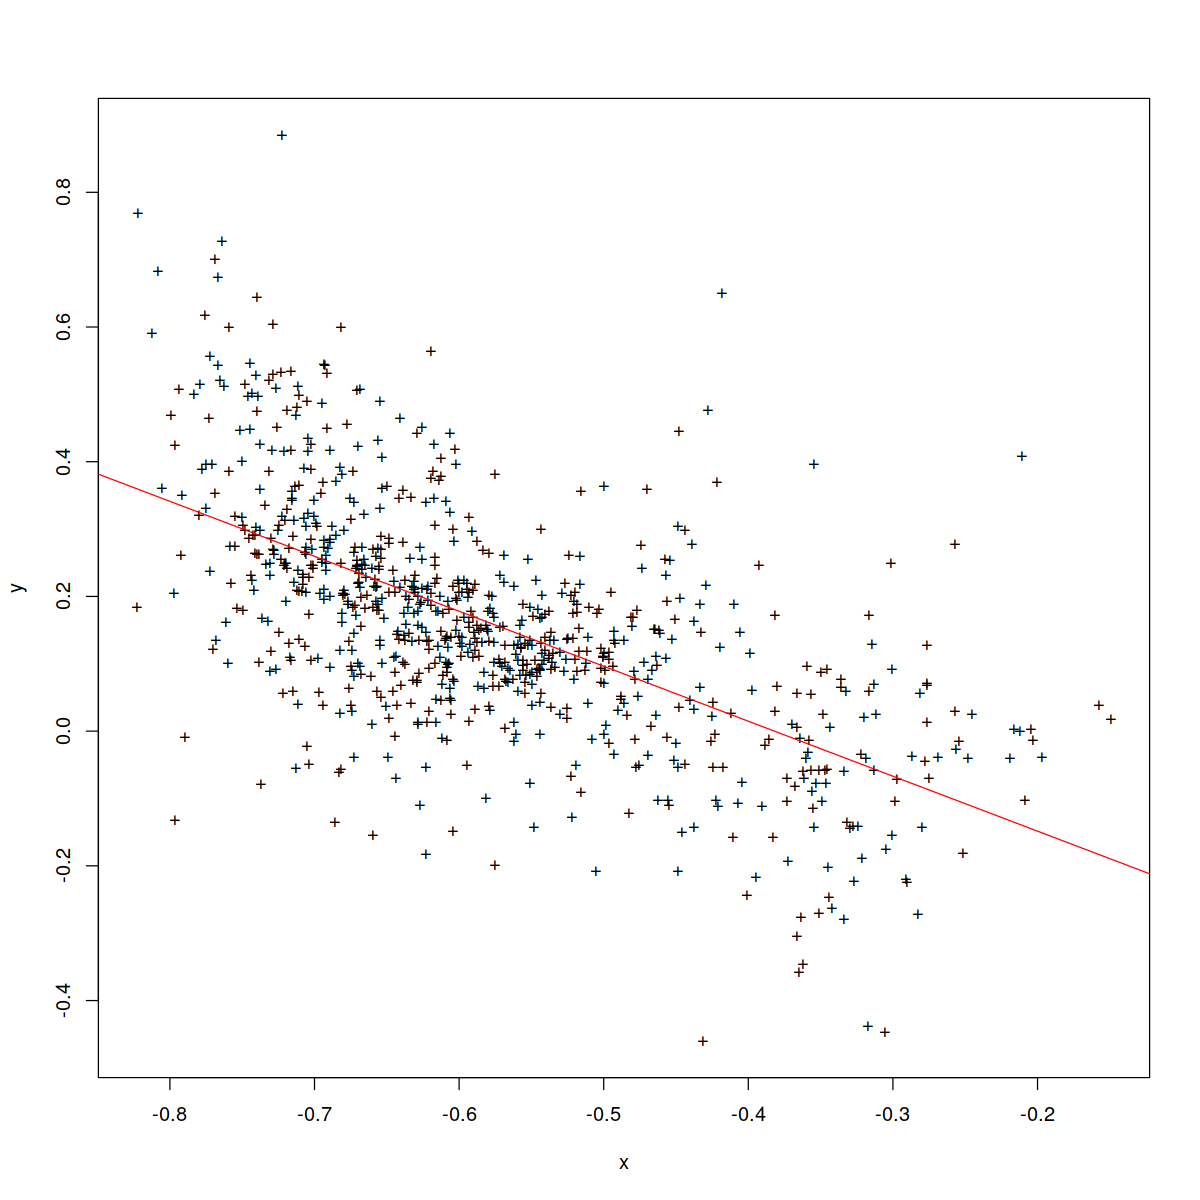

In [74]:
x <- internet$skewness # shorter days = more cars
y <- road$evcom.fixed.diff.Mean # morning commute
options(repr.plot.width=10, repr.plot.height=10)
plot(x, y, pch="+")
m <- lm(y ~ x)
abline(m, col="red")
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55484 -0.08148  0.00169  0.07323  0.58455 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0295605  0.0151928  -1.946   0.0521 .  
x            0.0091824  0.0006025  15.240   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1423 on 718 degrees of freedom
  (112 observations deleted due to missingness)
Multiple R-squared:  0.2444,	Adjusted R-squared:  0.2434 
F-statistic: 232.2 on 1 and 718 DF,  p-value: < 2.2e-16


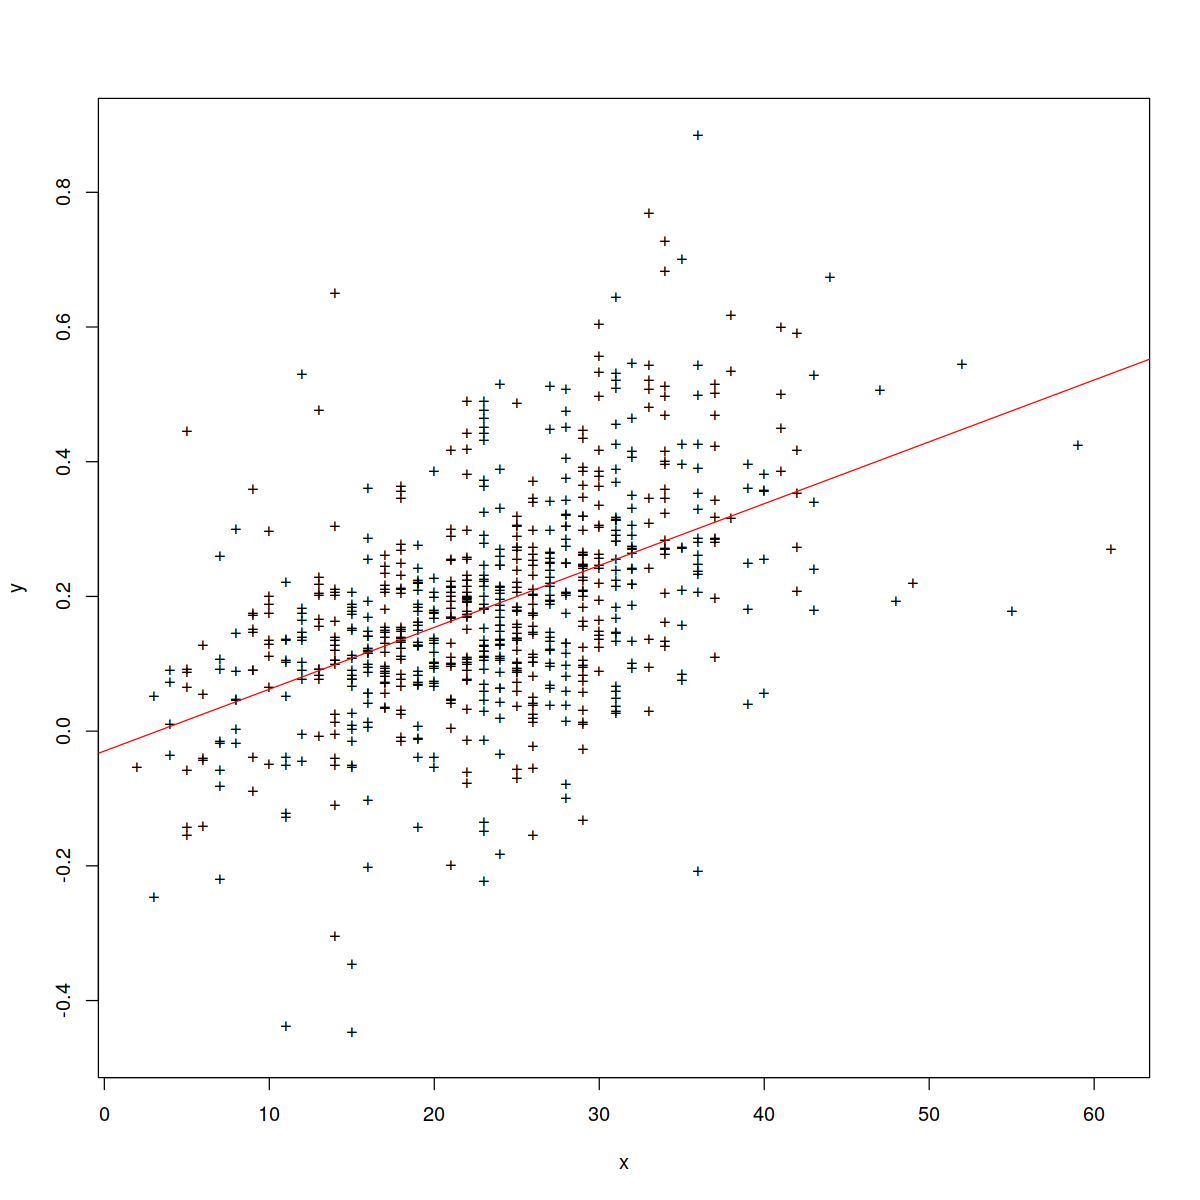

In [75]:
# int.eow.commute.length	road.evcom.fixed.diff.Mean	0.49
x <- internet$eow.commute.length # shorter days = more cars
y <- road$evcom.fixed.diff.Mean # morning commute
options(repr.plot.width=10, repr.plot.height=10)
plot(x, y, pch="+")
m <- lm(y ~ x)
abline(m, col="red")
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59908 -0.08367  0.00590  0.07912  0.61364 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.50082    0.10101  -14.86   <2e-16 ***
x            0.94953    0.05765   16.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1543 on 830 degrees of freedom
Multiple R-squared:  0.2464,	Adjusted R-squared:  0.2454 
F-statistic: 271.3 on 1 and 830 DF,  p-value: < 2.2e-16


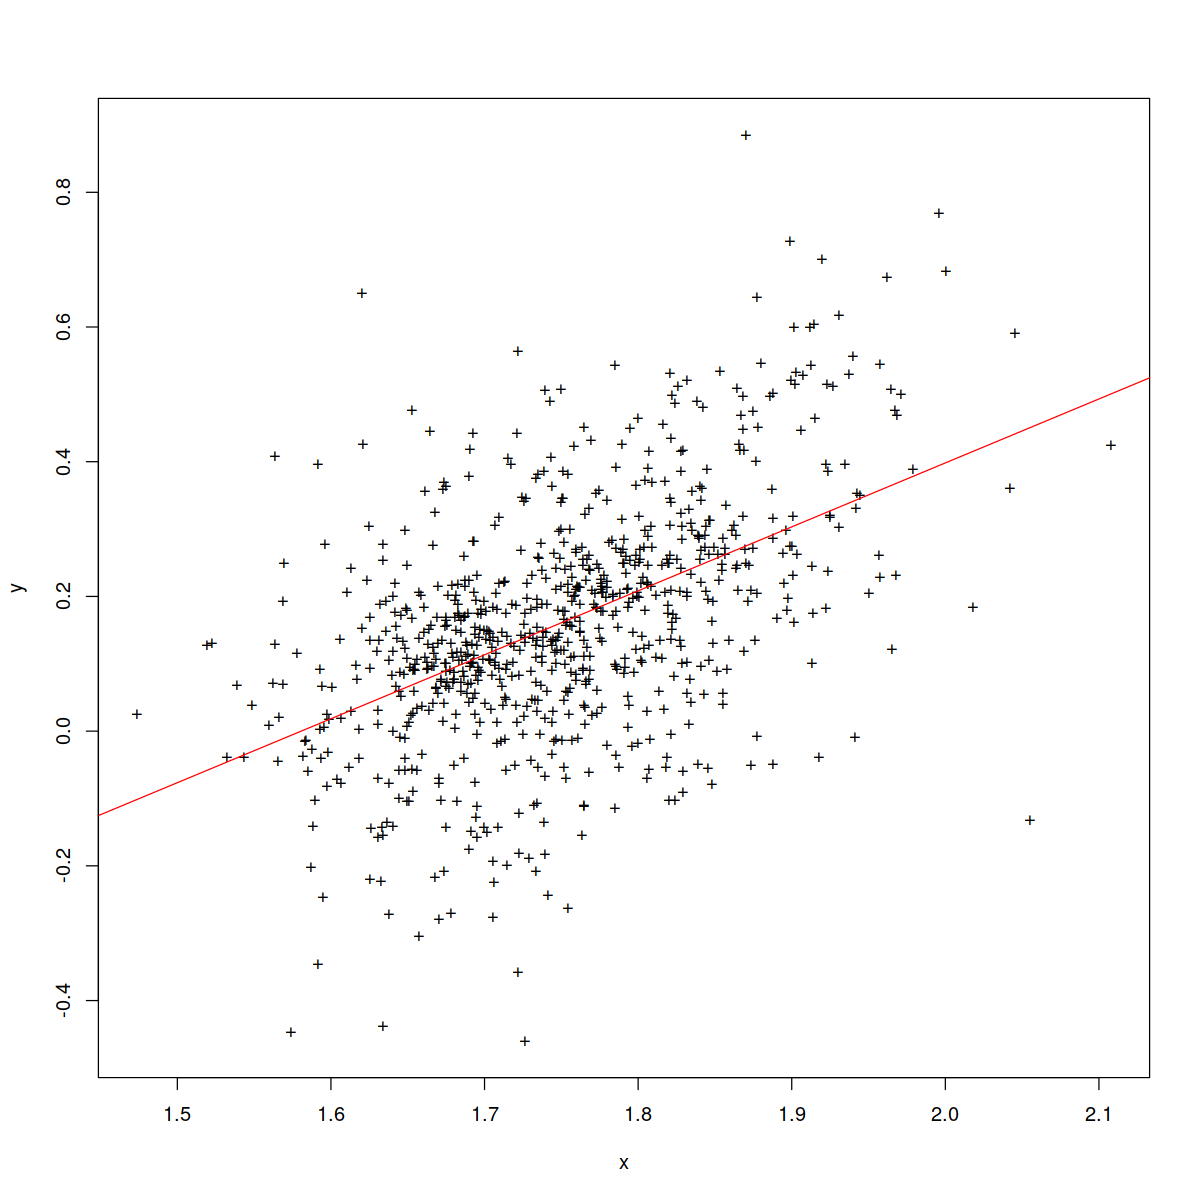

In [76]:
# int.eow.commute.length	road.evcom.fixed.diff.Mean	0.49
x <- internet$kurtosis # shorter days = more cars
y <- road$evcom.fixed.diff.Mean # morning commute
options(repr.plot.width=10, repr.plot.height=10)
plot(x, y, pch="+")
m <- lm(y ~ x)
abline(m, col="red")
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0764 -0.1546  0.0206  0.2001  1.3006 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.154454   0.033578   4.600    5e-06 ***
x           -0.001294   0.001332  -0.972    0.332    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3146 on 718 degrees of freedom
  (112 observations deleted due to missingness)
Multiple R-squared:  0.001313,	Adjusted R-squared:  -7.751e-05 
F-statistic: 0.9443 on 1 and 718 DF,  p-value: 0.3315


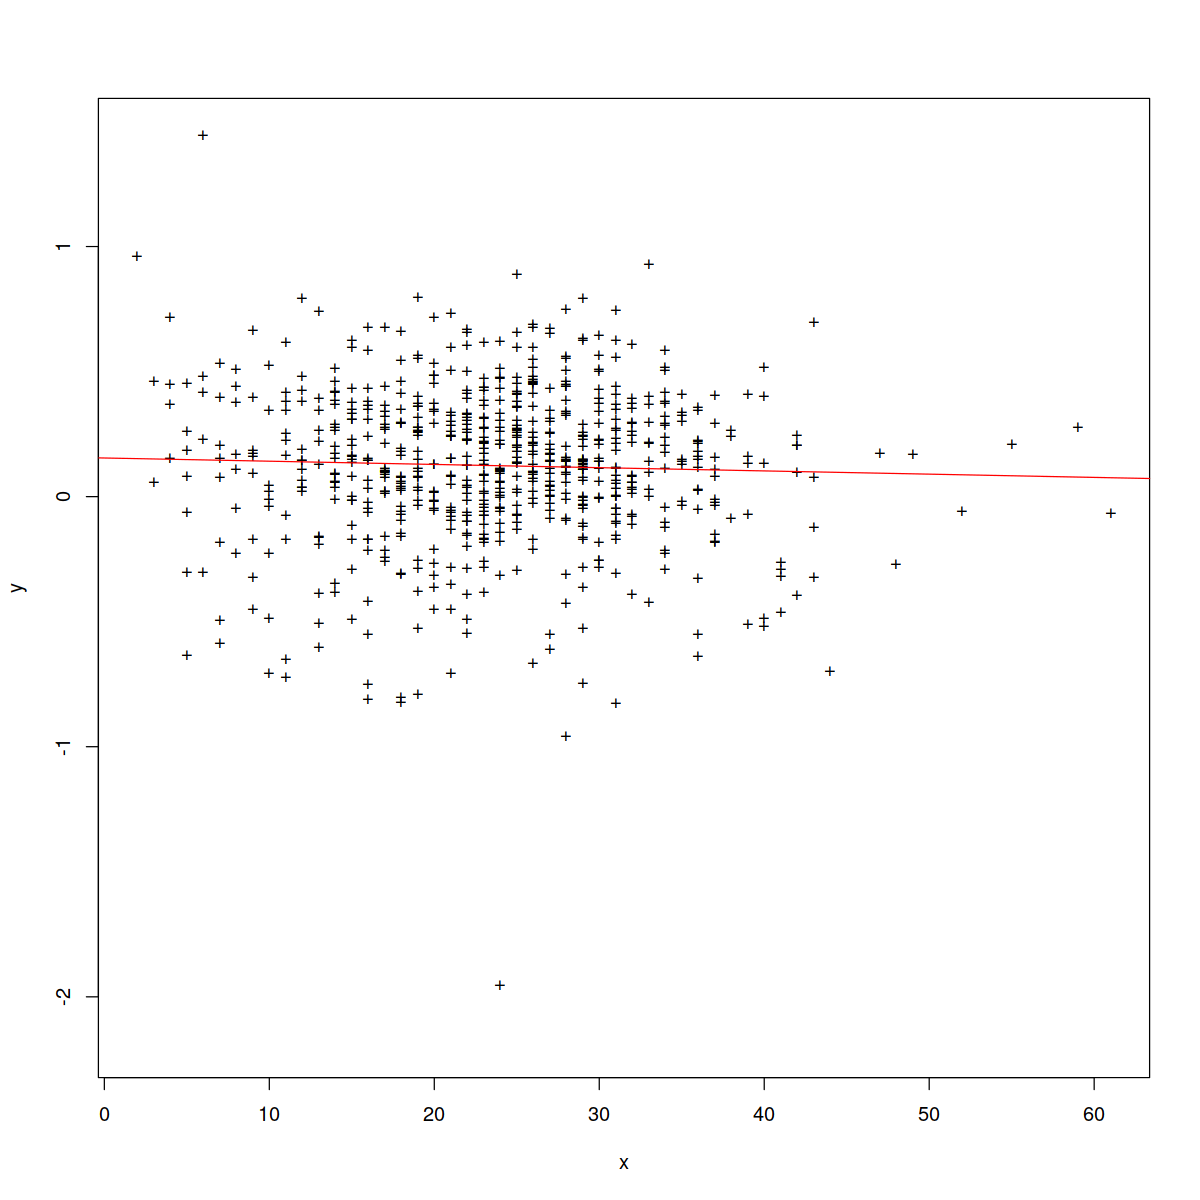

In [77]:
x <- internet$eow.commute.length # shorter days = more cars
y <- road$evcom.fixed.diff.skewness # morning commute
options(repr.plot.width=10, repr.plot.height=10)
plot(x, y, pch="+")
m <- lm(y ~ x)
abline(m, col="red")
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79397 -0.07054 -0.00185  0.06824  0.60002 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.1159240  0.0250359   -4.63 4.33e-06 ***
x            0.0057351  0.0004616   12.42  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1486 on 718 degrees of freedom
  (112 observations deleted due to missingness)
Multiple R-squared:  0.1769,	Adjusted R-squared:  0.1758 
F-statistic: 154.3 on 1 and 718 DF,  p-value: < 2.2e-16


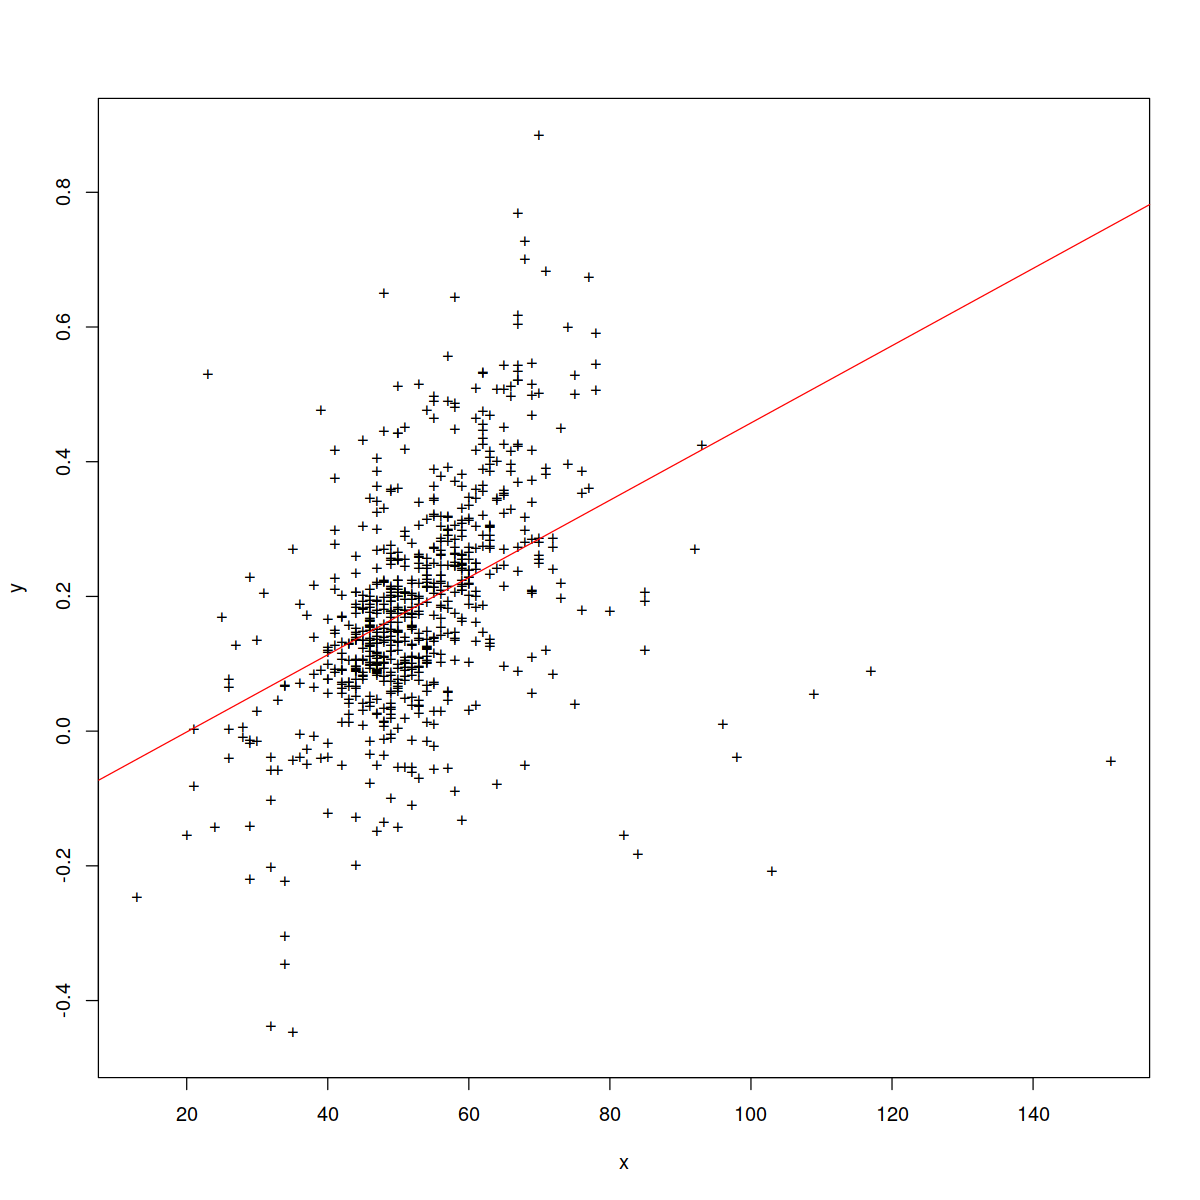

In [78]:
x <- internet$commute.length # shorter days = more cars
y <- road$evcom.fixed.diff.Mean # morning commute
options(repr.plot.width=10, repr.plot.height=10)
plot(x, y, pch="+")
m <- lm(y ~ x)
abline(m, col="red")
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85488 -0.21199  0.02564  0.20964  1.08662 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.934e-02  9.088e-02  -0.763    0.446    
x            1.949e-12  1.864e-13  10.455   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2958 on 830 degrees of freedom
Multiple R-squared:  0.1164,	Adjusted R-squared:  0.1153 
F-statistic: 109.3 on 1 and 830 DF,  p-value: < 2.2e-16


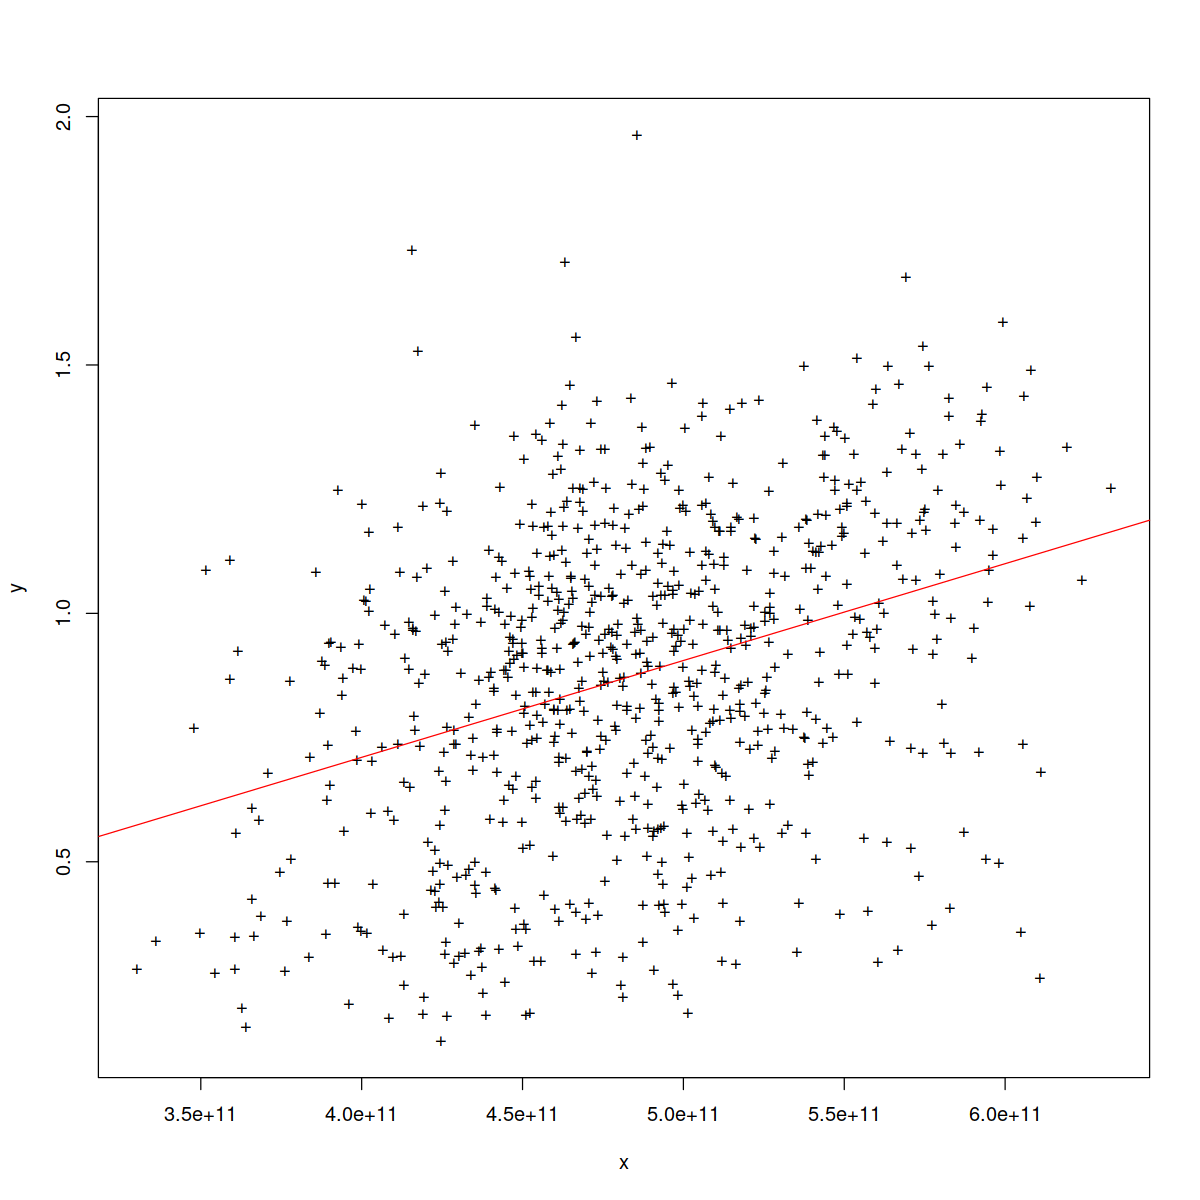

In [79]:
# int.evcom.diff.Mean     road.evcom.fixed.diff.sd
x <- internet$evcom.diff.Mean
y <- road$evcom.fixed.diff.sd
options(repr.plot.width=10, repr.plot.height=10)
plot(x, y, pch="+")
m <- lm(y ~ x)
abline(m, col="red")
summary(m)